<a href="https://colab.research.google.com/github/Bmartins25/Mineracao_de_dados_and_LLM_UFMG/blob/main/TP2_Disciplina_Mineracao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos: Bruno Bartolomeu e Carlos Large - Mineração de dados UFMG

Nome do Dataset: Olimpíadas 2024 vs PIB

Origem do Dataset: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

Características do Dataset: 10 Colunas | 7 Colunas numéricas e 3 Colunas texto

Objetivo: Será avaliado uma possível correlação entre a posição econômica de um país (representada pelo PIB per capita) e seu desempenho nas Olimpíadas de Verão de 2024.

Algumas questões potenciais que podem ser exploradas usando este conjunto de dados incluem:

 Um PIB maior está relacionado a mais medalhas olímpicas?
 Existem países com desempenho melhor do que o esperado com base em seu status econômico?


Segue abaixo a leitura do dataset e as análises solicitadas. No final do notebook, algumas respostas e mais análises de acordo com os algoritmos executados.

Dúvidas estou à disposição.

Bruno Bartolomeu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# Carregar a base de dados com delimitador correto
data = pd.read_csv('Olympics_games_2024.csv', delimiter=';')

In [ ]:
# Preparo dos dados para PCA e K-Means (excluindo colunas categóricas)
numeric_data = data[['gold', 'silver', 'bronze', 'total', 'gdp', 'population']].copy()

In [ ]:
# Remoção de dados nulos - Limpeza dos dados
numeric_data.dropna(inplace=True)

In [ ]:
# Normalização dos dados numéricos
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

In [ ]:
# Cálculo da matriz de correlação para encontrar associações entre as variáveis
correlation_matrix = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns).corr()
print("Correlation Matrix of Numeric Olympic Data:")
print(correlation_matrix)
plt.show()

Correlation Matrix of Numeric Olympic Data:
                gold    silver    bronze     total       gdp  population
gold        1.000000  0.910676  0.880333  0.960874  0.331392    0.445283
silver      0.910676  1.000000  0.939877  0.979703  0.305993    0.347893
bronze      0.880333  0.939877  1.000000  0.968294  0.376044    0.347596
total       0.960874  0.979703  0.968294  1.000000  0.347942    0.393278
gdp         0.331392  0.305993  0.376044  0.347942  1.000000   -0.112182
population  0.445283  0.347893  0.347596  0.393278 -0.112182    1.000000


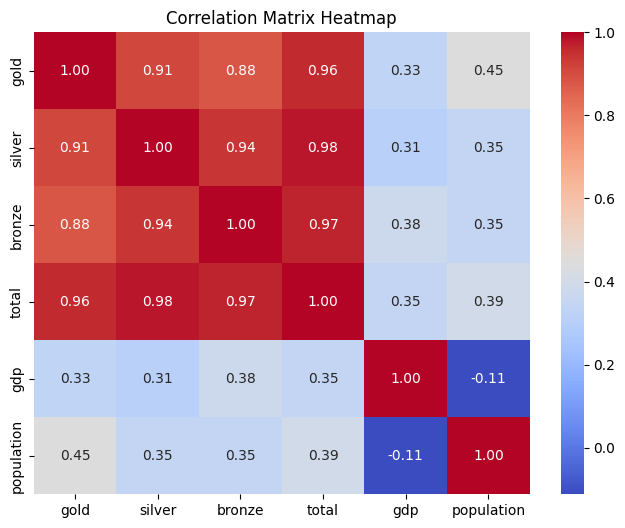

In [ ]:
# Gráfico da matriz de correlação (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

A matriz de correlação dos dados numéricos foi exibida. Essa análise mostra associações entre variáveis como gold, silver, bronze, total, gdp e population. Isso nos ajuda a identificar padrões e relações fortes, como entre o número total de medalhas (total) e as medalhas específicas (gold, silver, bronze).

In [ ]:
# Implementação do algoritmo ECLAT para mineração de padrões frequentes

# Binarização dos dados de medalhas para criar uma estrutura de transações
binary_data = data[['gold', 'silver', 'bronze']].applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-115-250da99d851a>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = data[['gold', 'silver', 'bronze']].applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
# Função para calcular frequências de conjuntos de itens
def eclat(data, min_support=0.3):
    from itertools import combinations
    itemsets = {}
    n_transactions = len(data)

    # Unitemsets (conjuntos de um único item)
    for column in data.columns:
        support = data[column].sum() / n_transactions
        if support >= min_support:
            itemsets[frozenset([column])] = support

    # Conjuntos de itens maiores
    k = 2
    while True:
        new_itemsets = {}
        previous_itemsets = list(itemsets.keys())
        for i in range(len(previous_itemsets)):
            for j in range(i + 1, len(previous_itemsets)):
                candidate = previous_itemsets[i] | previous_itemsets[j]
                if len(candidate) == k:
                    support = (data[list(candidate)].sum(axis=1) == k).mean()
                    if support >= min_support:
                        new_itemsets[candidate] = support
        if not new_itemsets:
            break
        itemsets.update(new_itemsets)
        k += 1

    return itemsets

In [ ]:
# Executar algoritimo de associação ECLAT com suporte mínimo de 30%
frequent_item = eclat(binary_data, min_support=0.3)
print("Frequent Itemsets (ECLAT):")
print(frequent_item)

Frequent Itemsets (ECLAT):
{frozenset({'gold'}): 0.7, frozenset({'silver'}): 0.7222222222222222, frozenset({'bronze'}): 0.8555555555555555, frozenset({'silver', 'gold'}): 0.5555555555555556, frozenset({'gold', 'bronze'}): 0.6111111111111112, frozenset({'silver', 'bronze'}): 0.6, frozenset({'silver', 'gold', 'bronze'}): 0.4888888888888889}


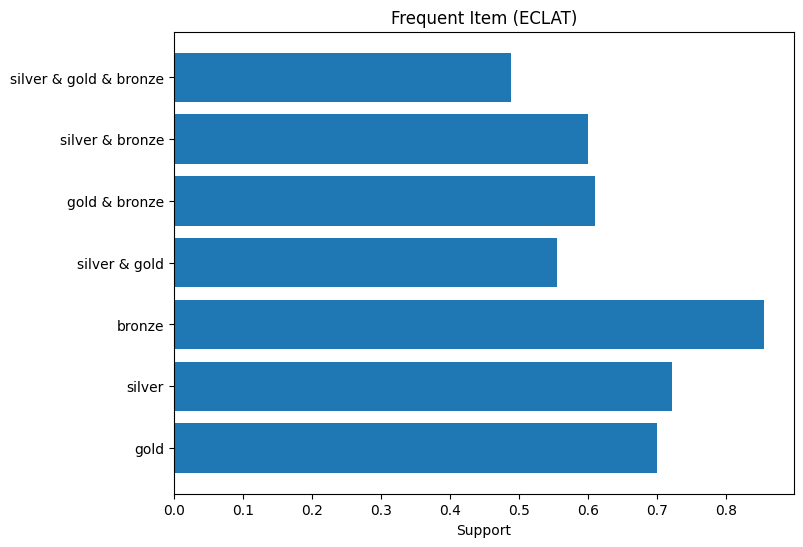

In [ ]:
# Gráfico dos resultados do ECLAT
plt.figure(figsize=(8, 6))
items = [' & '.join(list(item)) for item in frequent_item.keys()]
supports = list(frequent_item.values())
plt.barh(items, supports)
plt.xlabel('Support')
plt.title('Frequent Item (ECLAT)')
plt.show()

In [ ]:
# Aplicar PCA para reduzir a dimensionalidade a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)

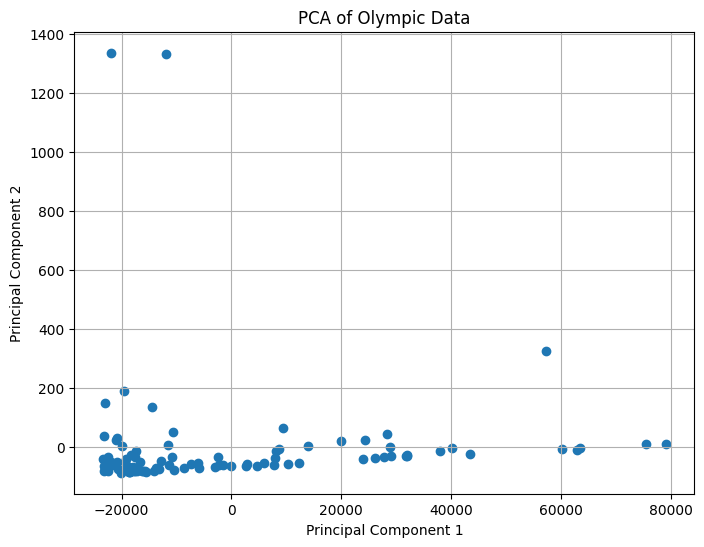

In [ ]:
# Gráfico do resultado do PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Olympic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# Aplicar KMeans clustering com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(numeric_data)

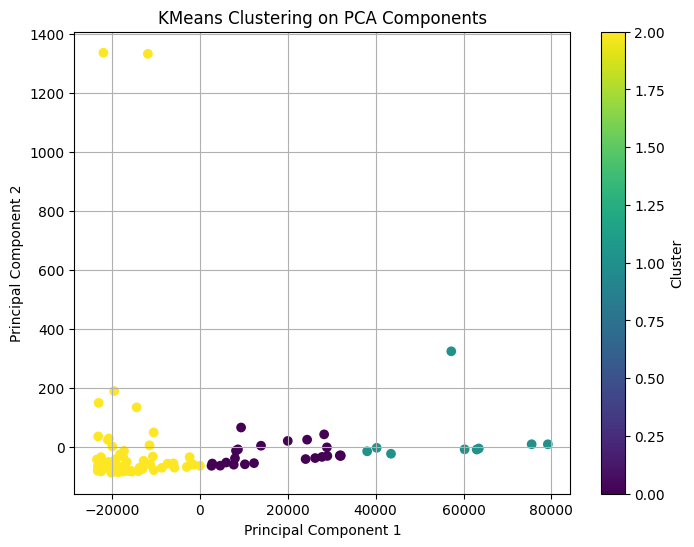

In [ ]:
# Gráfico do resultado da clusterização KMeans nos componentes do PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Parte da atividade do TP3 - Análise com LLM e algoritmos de Machine Learning - Chat GPT


In [ ]:
# Preparo dos dados para análise de regressão
X = data[['gdp', 'population']]
y = data['total']

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicar Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# Aplicar Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Avaliação dos modelos
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

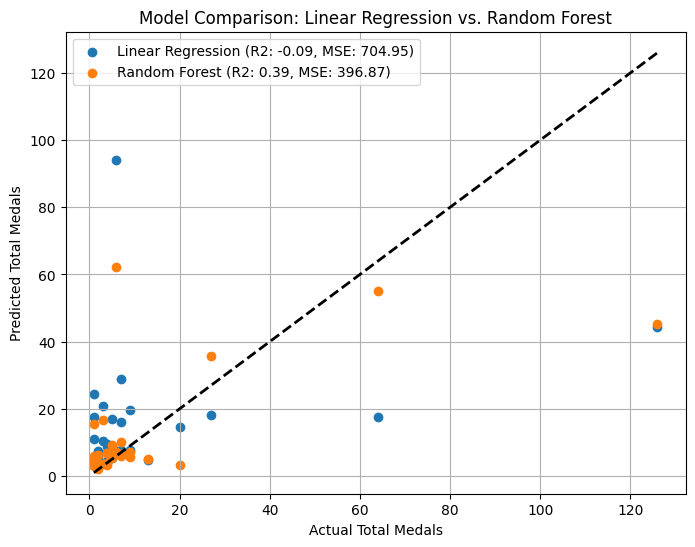

In [ ]:
# Gráfico de comparação das previsões dos modelos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, label=f'Linear Regression (R2: {linear_r2:.2f}, MSE: {linear_mse:.2f})')
plt.scatter(y_test, y_pred_rf, label=f'Random Forest (R2: {rf_r2:.2f}, MSE: {rf_mse:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Total Medals')
plt.ylabel('Predicted Total Medals')
plt.legend()
plt.title('Model Comparison: Linear Regression vs. Random Forest')
plt.grid(True)
plt.show()

------------------------------------------------------------------------------

-------------------------------------------------------------------------------

Esse script inclui:

* Dados separados por ponto e vírgula e ajustados o carregamento para que cada coluna seja reconhecida corretamente.

* Dados estão devidamente estruturados, limpos e normalizados.

* Binarização dos dados de medalhas: Convertendo para 1 (medalha conquistada) ou 0 (não conquistada).







* Algoritmos de Mineração utilizados:

1. Algoritmo de Associação ECLAT: A função percorre combinações de medalhas para identificar conjuntos frequente e calcula com um suporte mínimo especificado (neste caso, 30%).

2. Algoritmo de Clusterização:

* (K-Means ou DBSCAN): Para agrupar países com características similares, como números de medalhas e PIB.

* Análise de Componentes Principais (PCA): Reduzir a dimensionalidade e identificar padrões latentes entre medalhas e características econômicas.

3. Algoritmos de Machine Learning : Para prever a quantidade de medalhas com base em variáveis econômicas e populacionais:

* Regressão Linear Múltipla: Para prever o total de medalhas com base em PIB e população.
* Random Forest: Pode capturar interações mais complexas entre as variáveis para prever o número de medalhas.

De acordo com a base de dados utilizado, os resultados sugerem que a Random Forest é mais eficaz para prever a quantidade de medalhas com base nas variáveis econômicas e populacionais, enquanto o K-Means e o PCA ajudam na análise exploratória dos padrões na base.